<a href="https://colab.research.google.com/github/tavishcode/fyp/blob/master/notebooks/wiki_fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Input, Activation, CuDNNGRU, GRU, Dense
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import scale, StandardScaler, RobustScaler
from collections import OrderedDict, defaultdict
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')
plt.rcParams['figure.figsize'] = [10, 8] 
plt.style.use('default')
from scipy import fftpack as fftp

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ds = pd.read_csv('drive/My Drive/portals-1.csv', index_col=0)

In [77]:
ds.shape

(16384, 404)

In [0]:
train = ds.iloc[:, range(1,201)].values

In [79]:
train.shape

(16384, 200)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if sys.path[0] == '':


0.005050505050505051
0.010101010101010102
0.14646464646464646


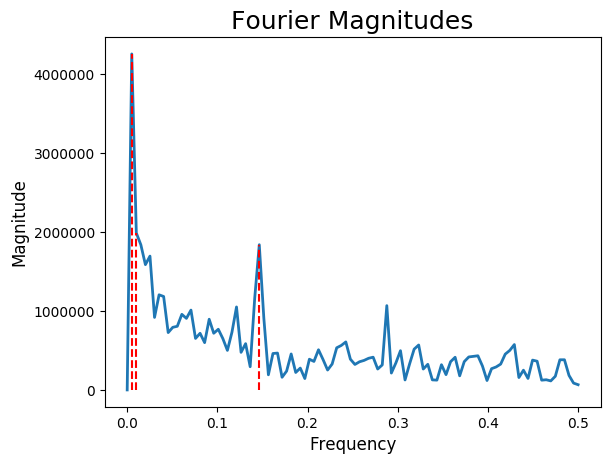

In [91]:
agg_train = np.sum(train, axis=0)

# Number of samplepoints
N = 200

# sample spacing
T = 1 

# noramlized data
y = agg_train - np.mean(agg_train)

xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

yf = fftp.fft(y)
import matplotlib
matplotlib.rc('font', size=10)
matplotlib.rc('axes', titlesize=18)

plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), linewidth=2)

num_peaks = 3

top_peaks = np.argsort(2.0/N * np.abs(yf[:N//2]))[::-1][:num_peaks]

for peak in top_peaks:
  plt.plot([xf[peak], xf[peak]], [0, 2.0/N * np.abs(yf[peak])], 'r--',linewidth=1.5)
  print(xf[peak])
plt.ylabel('Magnitude', fontsize=12)
plt.xlabel('Frequency', fontsize=12)
plt.title('Fourier Magnitudes')
plt.savefig('fmags.png', bbox_inches='tight')

In [0]:
top_peak_pairs = np.argsort(2.0/N * np.abs(yf))[::-1][:num_peaks*2]

In [93]:
top_peak_pairs

array([199,   1, 198,   2, 171,  29])

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


200
200
200


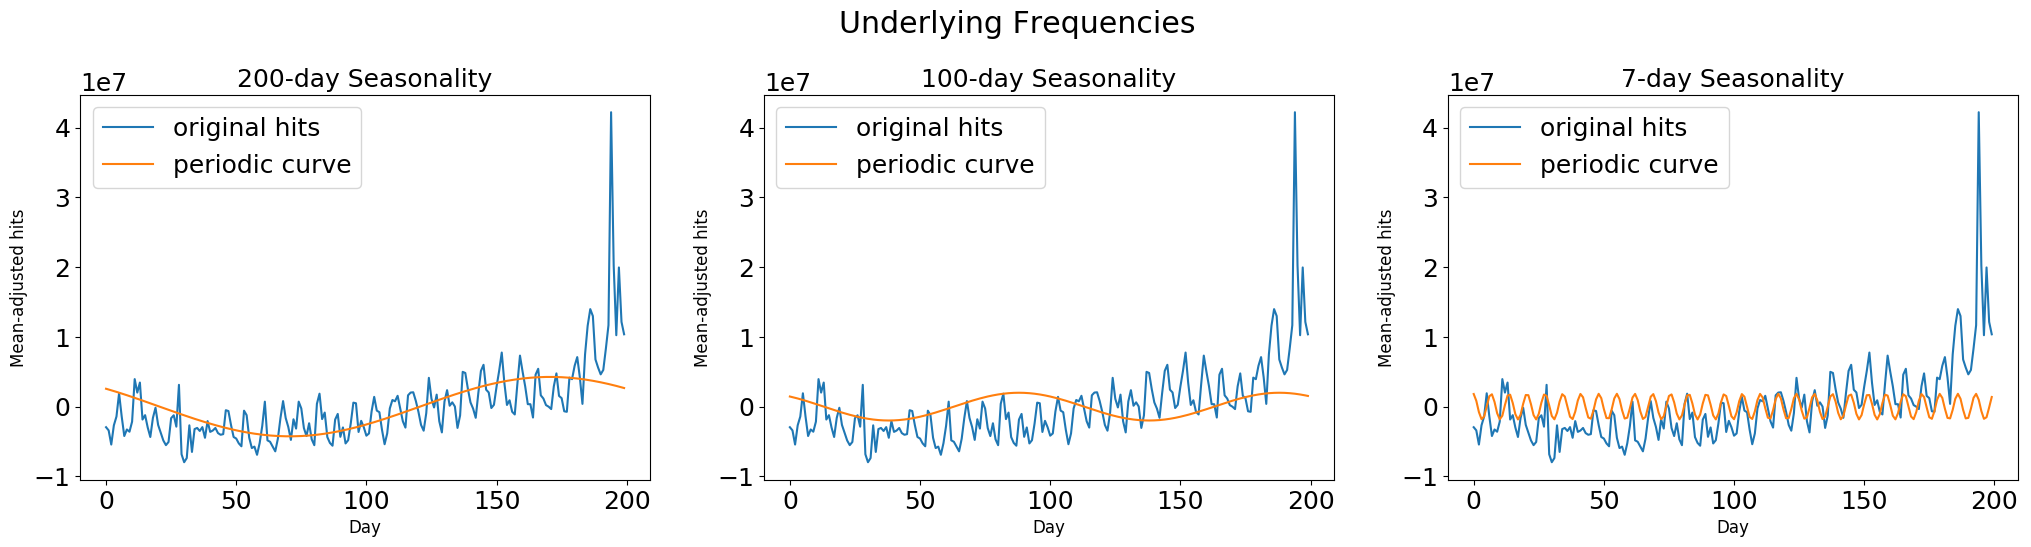

In [123]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(25, 5)
fig.suptitle('Underlying Frequencies', y=1.05)
count = 0
for i in range(0, top_peak_pairs.shape[0], 2):
    yff = np.copy(yf)
    for j in range(len(yff)):
        if j != top_peak_pairs[i] and j != top_peak_pairs[i+1]:
            yff[j] = 0
    axes[count].plot(agg_train-np.mean(agg_train))
    axes[count].plot(fftp.ifft(yff))
    count+=1
    print(len(fftp.ifft(yff)))
axes[0].set_title('200-day Seasonality', fontsize=18)
axes[0].set_ylabel('Mean-adjusted hits', fontsize=12)
axes[0].set_xlabel('Day', fontsize=12)
axes[0].legend(['original hits','periodic curve'])
axes[1].set_title('100-day Seasonality', fontsize=18)
axes[1].set_ylabel('Mean-adjusted hits', fontsize=12)
axes[1].set_xlabel('Day', fontsize=12)
axes[1].legend(['original hits','periodic curve'])
axes[2].set_title('7-day Seasonality', fontsize=18)
axes[2].set_ylabel('Mean-adjusted hits', fontsize=12)
axes[2].set_xlabel('Day', fontsize=12)
axes[2].legend(['original hits','periodic curve'])
plt.subplots_adjust(hspace=0.5)
plt.savefig('fourier.png', bbox_inches='tight')